** Robert Lacher MATH 3332 Section 52 Midterm **

# 1. A college is buying dry-erase markers from three companies, company A, company B, company C. The defect rates, the number of defected markers per company, are 8%, 5%, 3% respectively. College bought 10,000 markers, 5% from company A, 20% from company B, and 75% from company C. Randomly picked marker has been found defected. What are the chances that it comes from a company other than company C?

The probability that a marker is defective can be calculated as the defect rate crossed with the number of markers purchased, or $0.08(0.05) \cdot 0.05(0.20) \cdot 0.03(0.75) = 0.0365$.



# 2. Suppose that $X_j , j=1,2,…,N$ are random variables with $E(X_j)=j$ and $E({X_j}^2)=(j+1)^2$. Let $\bar X$ be the average of $X_j , j=1,2,…,N$. Compute $E(\bar X)$ and $Var(\bar X)$.

# 3. Determine which one of the columns comes from normal distribution.

In [5]:
import pandas as pd
df = pd.read_csv(open('midterm_problem_3.csv'))
print df

          X1        X2        X3        X4
0   0.041898  0.437494  0.334954  0.084224
1   0.483735  0.788231  0.507016  0.140374
2   0.627543  0.445117  0.373120  0.084224
3   0.064137  0.279195  0.295348  0.140374
4   0.080565  0.187316  0.217636  0.065278
5   0.225623  0.348539  0.594041  0.175467
6   0.784991  0.552950  0.584063  0.084224
7   0.160843  0.074768  0.157885  0.104445
8   0.181274  0.267089  0.615134  0.104445
9   0.176462  0.203595  0.317253  0.146223
10  0.533583  0.607144  0.034786  0.065278
11  0.950223  0.316262  0.398348  0.065278
12  0.831014  0.511033  0.031871  0.146223
13  0.978157  0.478149  0.489227  0.175467
14  0.927068  0.616517  0.035614  0.065278
15  0.899748  0.669956  0.533053  0.140374
16  0.366848  0.287676  0.678295  0.006738
17  0.135146  0.631404  0.056394  0.146223
18  0.600702  0.814617  0.572941  0.175467


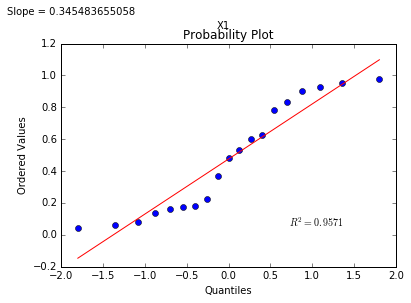

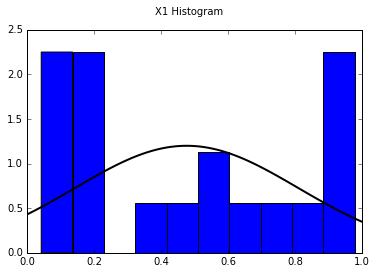

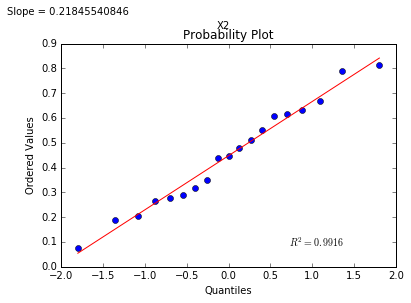

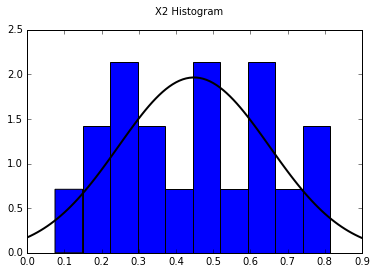

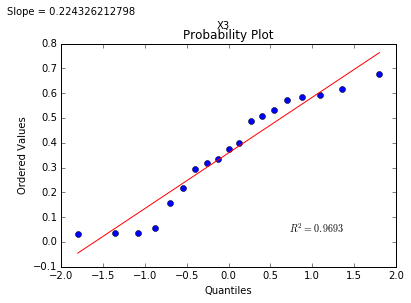

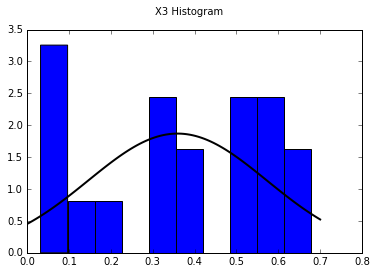

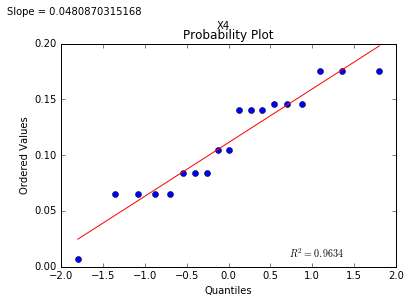

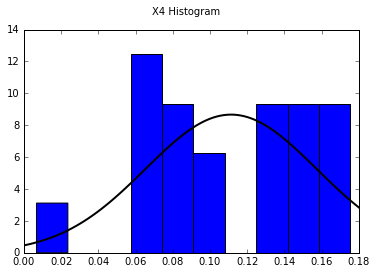

In [6]:
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import numpy as np
%matplotlib inline

# Iterate over each dataset (x1, x2, etc)
for key in df.keys():
    
    # Create array of float-type values from the dataset
    values = df[key]
    
    # Create a seperate figure to create the probability plot
    fig = plt.figure()
    fig.suptitle('%s' % key)
    # Produce the probability plot
    res = scipy.stats.probplot(values, plot=plt)
    fig.text(0, 1, 'Slope = %s' % res[1][0])
    
    # Create a separate figure to create the histogram
    fig2 = plt.figure()
    fig2.suptitle('%s Histogram' % key)
    # Produce the histogram using normalized values
    plt.hist(values, normed=True)
    
    # Add the normal distribution curve to the plot
    mu, std = scipy.stats.norm.fit(values)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = scipy.stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

plt.show()

x2 is the normal distribution -- it has both the highest $R^2$ value and the best graphical representation of a normal distribution.

# 4. The Markov diagram is given below. Create the transformation matrix. Using the transformation matrix determine what is more probable to get to C in 9 or less rounds if you start from A, or B, or D?

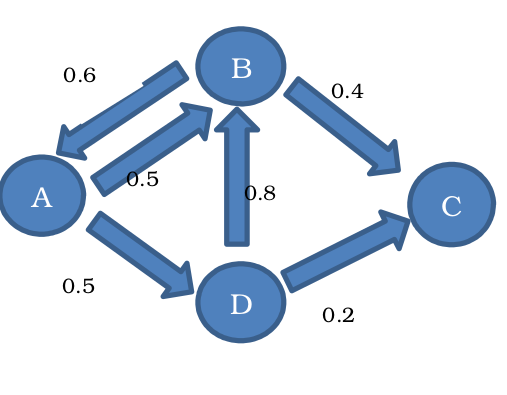

In [8]:
from IPython.display import Image
Image(filename='midterm.png') 

In [74]:
import pandas as pd

# Headers are used for column labels
headers = ['A', 'B', 'C', 'D']
df = pd.read_csv(open('midterm_problem_4.csv'), index_col=0, names=headers)
print df
print "-"*50
import numpy as np
sums = {}

# Iterate for 9 rounds [1, 10) and sum probabilities of ending at C for that round
for i in xrange(1,10):
    df = pd.DataFrame(np.linalg.matrix_power(df.values, i), index=headers, columns=headers)
    for key in df.keys():
        if key in sums:
            sums[key] += df.T[key].C
        else:
            sums[key] = df.T[key].C               
print sums

     A    B    C    D
A  0.0  0.5  0.0  0.5
B  0.6  0.0  0.4  0.0
C  0.0  0.0  0.0  0.0
D  0.0  0.8  0.2  0.0
--------------------------------------------------
{'A': 0.36624374581425778, 'C': 0.0, 'B': 0.47264906543229596, 'D': 0.56386576862555116}


**D** is the most probable to end at **C** after 9 rounds, with a probability of 0.56386576862555116.

# 5. Use Monte-Carlo method to find the area of the intersection of the circle centered at (1,1) and radius 1 and the circle centered at (1,2) and radius 1.

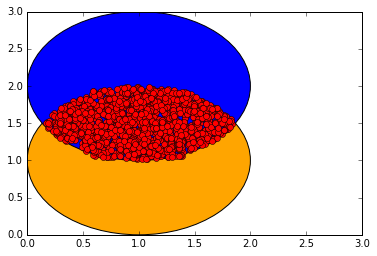

Area Circle = 1.2276
Area Square = 9


In [4]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

# Constants defining Monte Carlo simulation and plot
X_MIN = 0
X_MAX = 3
Y_MIN = X_MIN
Y_MAX = X_MAX
NUM_POINTS = 10000

# Plotting information
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(X_MIN, X_MAX)
ax.set_ylim(Y_MIN, Y_MAX)
ax.add_patch(patches.Circle((1, 1), radius=1, facecolor='orange'))
ax.add_patch(patches.Circle((1, 2), radius=1))

# Pathing information
circle_1 = path.Path.circle((1.0, 1.0), radius=1.0)
circle_2 = path.Path.circle((1.0, 2.0), radius=1.0)

# Random values for Monte Carlo
rand_x = np.random.uniform(low=X_MIN, high=X_MAX, size=NUM_POINTS)
rand_y = np.random.uniform(low=X_MIN, high=X_MAX, size=NUM_POINTS)

# Create tuples of (X, Y) coordinates
points = zip(rand_x, rand_y)

# num_inside will store the number of points inside both circles
num_inside = 0

# Iterate over every point to determine if it is within the circles
for index, point in enumerate(points):

    # Check that the point falls within both circles
    if circle_1.contains_points((point,)) and circle_2.contains_points((point,)):

        # If it does, we'll plot the point and increment the counter
        plt.plot(point[0], point[1], 'ro')
        num_inside += 1
        
plt.show()

area_square = (abs(X_MIN) + abs(X_MAX)) ** 2
area_circle = (num_inside / NUM_POINTS) * area_square
print "Area Circle = %s" % area_circle
print "Area Square = %s" % area_square

The area of the intersection of the two circles is **1.2276**.

# 7. The data below are motor vehicle death rates for Alabama for different age groups:

Slope = 0.0836101195095
R-squared = 0.142448437268


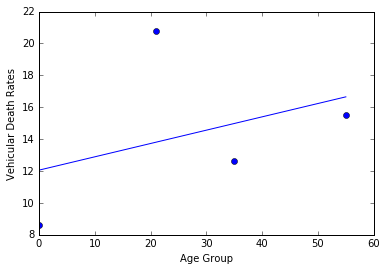

In [9]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['X', 'Y']
x = np.array([0, 21, 35, 55])
y = np.array([8.6, 20.8, 12.6, 15.5])

#df = pd.DataFrame(zip(x, y), columns=headers)
#print df

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

y_predict = slope * x + intercept
plt.plot(x, y, 'bo')
plt.plot(x, y_predict, 'b-')
plt.xlabel("Age Group")
plt.ylabel("Vehicular Death Rates")

print "Slope = %s" % slope
print "R-squared = %s" % r_value**2

From the graph, it can be seen that age 21 is the outlier. It is furthest from the best-fit line. When 21 is removed from the sample, the graph then becomes

Slope = 0.124193548387
R-squared = 0.995859125153


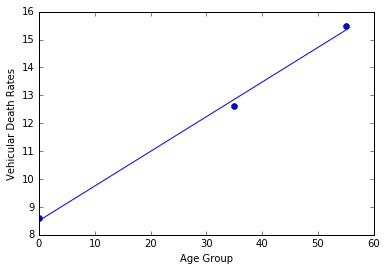

In [14]:
x = np.array([0, 35, 55])
y = np.array([8.6, 12.6, 15.5])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

y_predict = slope * x + intercept
plt.plot(x, y, 'bo')
plt.plot(x, y_predict, 'b-')
plt.xlabel("Age Group")
plt.ylabel("Vehicular Death Rates")

print "Slope = %s" % slope
print "R-squared = %s" % r_value**2

with an $R^2$ value of 0.99 and a much nicer best-fit line. Adding age 70 to the sample, we can predict that

Slope = 0.124193548387
R-squared = 0.995859125153


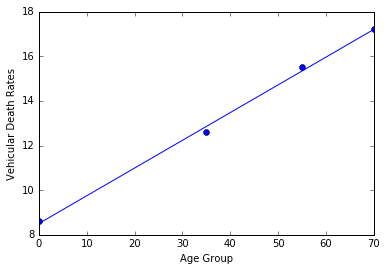

In [20]:
x = np.array([0, 35, 55, 70])
y = [8.6, 12.6, 15.5]
y.append(slope * 70 + intercept)
y_predict = slope * x + intercept

plt.plot(x, y, 'bo')
plt.plot(x, y_predict, 'b-')
plt.xlabel("Age Group")
plt.ylabel("Vehicular Death Rates")

print "Slope = %s" % slope
print "R-squared = %s" % r_value**2